In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Caravan.csv")
df

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,5818,36,1,1,2,8,0,6,1,2,1,2,6,5,3,2,2,5,2,2,0,0,4,1,3,2,3,3,3,0,9,0,5,1,3,5,4,4,3,3,...,6,0,4,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,No
5818,5819,35,1,4,4,8,1,4,1,4,6,0,3,2,2,5,0,0,9,2,1,1,3,3,2,0,4,5,0,0,3,6,6,1,2,6,3,0,9,0,...,0,0,0,0,1,0,0,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,No
5819,5820,33,1,3,4,8,0,6,0,3,5,1,4,3,3,4,0,1,8,1,0,0,2,3,5,1,1,1,4,4,7,2,4,0,5,8,1,5,3,1,...,6,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Yes
5820,5821,34,1,3,2,8,0,7,0,2,7,2,0,0,4,5,0,2,7,0,2,0,2,4,2,0,0,4,5,0,2,7,5,4,0,9,0,0,5,4,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No


In [ ]:
df.dropna

<bound method DataFrame.dropna of       Unnamed: 0  MOSTYPE  MAANTHUI  ...  AINBOED  ABYSTAND  Purchase
0              1       33         1  ...        0         0        No
1              2       37         1  ...        0         0        No
2              3       37         1  ...        0         0        No
3              4        9         1  ...        0         0        No
4              5       40         1  ...        0         0        No
...          ...      ...       ...  ...      ...       ...       ...
5817        5818       36         1  ...        0         0        No
5818        5819       35         1  ...        0         0        No
5819        5820       33         1  ...        0         0       Yes
5820        5821       34         1  ...        0         0        No
5821        5822       33         1  ...        0         0        No

[5822 rows x 87 columns]>

In [ ]:
df=df.drop("Unnamed: 0",axis=1)


In [ ]:
x=df.drop("Purchase",axis=1)
x

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,2,6,5,3,2,2,5,2,2,0,0,4,1,3,2,3,3,3,0,9,0,5,1,3,5,4,4,3,3,0,...,0,6,0,4,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,0,3,2,2,5,0,0,9,2,1,1,3,3,2,0,4,5,0,0,3,6,6,1,2,6,3,0,9,0,0,...,0,0,0,0,0,1,0,0,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,1,4,3,3,4,0,1,8,1,0,0,2,3,5,1,1,1,4,4,7,2,4,0,5,8,1,5,3,1,1,...,0,6,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5820,34,1,3,2,8,0,7,0,2,7,2,0,0,4,5,0,2,7,0,2,0,2,4,2,0,0,4,5,0,2,7,5,4,0,9,0,0,5,4,0,...,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df
y=df.Purchase
y

0        No
1        No
2        No
3        No
4        No
       ... 
5817     No
5818     No
5819    Yes
5820     No
5821     No
Name: Purchase, Length: 5822, dtype: object

In [ ]:
from sklearn import preprocessing
x_array = np.array(x)
print(x_array.shape)
# normalized_arr = preprocessing.normalize([x_array])
# print(normalized_arr)


(5822, 85)


In [ ]:
d = preprocessing.normalize(x)
scaled_df = pd.DataFrame(d)
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,0.788400,0.023891,0.071673,0.047782,0.191127,0.000000,0.119455,0.023891,0.071673,0.167236,0.000000,0.047782,0.023891,0.047782,0.143346,0.023891,0.047782,0.167236,0.023891,0.000000,0.023891,0.047782,0.119455,0.047782,0.023891,0.023891,0.047782,0.143346,0.023891,0.023891,0.191127,0.191127,0.000000,0.023891,0.191127,0.023891,0.000000,0.095564,0.119455,0.000000,...,0.0,0.143346,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.119455,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.023891,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023891,0.0,0.0,0.0,0.0,0.0
1,0.844406,0.022822,0.045644,0.045644,0.182574,0.022822,0.091287,0.022822,0.091287,0.136931,0.045644,0.045644,0.000000,0.091287,0.114109,0.000000,0.114109,0.091287,0.000000,0.000000,0.000000,0.114109,0.000000,0.091287,0.000000,0.045644,0.068465,0.114109,0.000000,0.045644,0.159752,0.159752,0.022822,0.045644,0.136931,0.068465,0.045644,0.000000,0.114109,0.045644,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.045644,0.0,0.0,0.0,0.0,0.0,0.045644,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.022822,0.0,0.0,0.0,0.0,0.0
2,0.831933,0.022485,0.044969,0.044969,0.179878,0.000000,0.089939,0.044969,0.089939,0.067454,0.044969,0.089939,0.089939,0.089939,0.044969,0.000000,0.112423,0.089939,0.000000,0.000000,0.000000,0.157393,0.000000,0.044969,0.000000,0.112423,0.000000,0.089939,0.000000,0.157393,0.044969,0.157393,0.000000,0.044969,0.202362,0.000000,0.089939,0.112423,0.000000,0.000000,...,0.0,0.134908,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.044969,0.0,0.0,0.0,0.0,0.0,0.022485,0.0,0.0,0.022485,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.022485,0.0,0.0,0.0,0.0,0.0
3,0.374675,0.041631,0.124892,0.124892,0.124892,0.083261,0.124892,0.083261,0.166522,0.208153,0.083261,0.083261,0.083261,0.124892,0.166522,0.124892,0.166522,0.083261,0.166522,0.000000,0.000000,0.124892,0.041631,0.083261,0.124892,0.083261,0.041631,0.166522,0.000000,0.208153,0.166522,0.374675,0.000000,0.000000,0.291414,0.083261,0.041631,0.208153,0.124892,0.000000,...,0.0,0.249783,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.083261,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.041631,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.041631,0.0,0.0,0.0,0.0,0.0
4,0.835148,0.020879,0.083515,0.041757,0.208787,0.020879,0.083515,0.020879,0.083515,0.146151,0.020879,0.041757,0.041757,0.083515,0.083515,0.104393,0.083515,0.000000,0.000000,0.104393,0.083515,0.000000,0.000000,0.000000,0.187908,0.000000,0.000000,0.000000,0.000000,0.083515,0.104393,0.125272,0.041757,0.020879,0.104393,0.083515,0.000000,0.000000,0.187908,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.125272,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.020879,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.832273,0.023119,0.023119,0.046237,0.184949,0.000000,0.138712,0.023119,0.046237,0.023119,0.046237,0.138712,0.115593,0.069356,0.046237,0.046237,0.115593,0.046237,0.046237,0.000000,0.000000,0.092475,0.023119,0.069356,0.046237,0.069356,0.069356,0.069356,0.000000,0.208068,0.000000,0.115593,0.023119,0.069356,0.115593,0.092475,0.092475,0.069356,0.069356,0.000000,...,0.0,0.138712,0.0,0.092475,0.0,0.000000,0.0,0.0,0.000000,0.069356,0.0,0.0,0.0,0.069356,0.0,0.0,0.0,0.0,0.0,0.02311

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(scaled_df,y,test_size=0.2,random_state=55)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(x_test,y_test)


0.894420600858369

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
clf.score(x_test,y_test)


0.934763948497854

In [ ]:
from sklearn.model_selection import KFold

LDA: 0.931926 (0.009920)
CART: 0.893057 (0.012717)


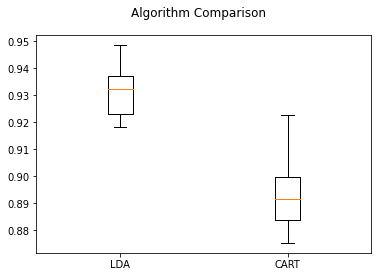

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('CART', DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	Kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, x_train, y_train, cv=Kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LDA: 0.927962 (0.024137)
CART: 0.892698 (0.026158)


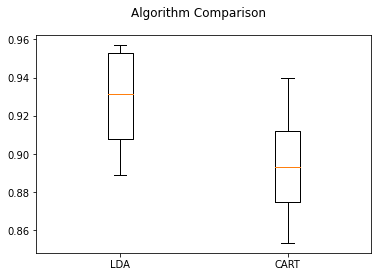

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('CART', DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	Kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model,x_test ,y_test , cv=Kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
print(models)

[('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)), ('CART', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'))]


In [ ]:

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for name , model in models:
    model.fit(x_train, y_train) # fit the model
    y_pred= model.predict(x_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

The accuracy of model LinearDiscriminantAnalysis is 0.93
              precision    recall  f1-score   support

          No       0.94      0.99      0.97      1099
         Yes       0.08      0.02      0.03        66

    accuracy                           0.93      1165
   macro avg       0.51      0.50      0.50      1165
weighted avg       0.89      0.93      0.91      1165



The accuracy of model DecisionTreeClassifier is 0.89
              precision    recall  f1-score   support

          No       0.95      0.94      0.94      1099
         Yes       0.13      0.15      0.14        66

    accuracy                           0.89      1165
   macro avg       0.54      0.54      0.54      1165
weighted avg       0.90      0.89      0.90      1165



